In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df188 = pd.read_csv('188everything.csv')
df188['datetime'] = df188.datetime.apply(pd.to_datetime)

In [4]:
df188

,Unnamed: 0,h3_h3_dt,h3_h3_depth,id,h3_h4_dt,h3_h4_depth,h3_h5_dt,h3_h5_depth,h3_h6_dt,h3_h6_depth,...,h5_h6_depth,h6_h3_dt,h6_h3_depth,h6_h4_dt,h6_h4_depth,h6_h5_dt,h6_h5_depth,h6_h6_dt,h6_h6_depth,datetime
0,0,0.0,NaN,0,-0.042,168.250,0.110,301.250,0.061,258.375,...,302.125,-0.061,468.375,-0.103,505.125,0.049,372.125,0.0,NaN,2019-07-07 08:44:18.016999+00:00
1,1,0.0,NaN,1,-0.062,150.750,-0.111,107.875,-0.159,65.875,...,303.000,0.159,275.875,0.097,330.125,0.048,373.000,0.0,NaN,2019-07-07 08:45:02.184999+00:00
2,2,0.0,NaN,2,-0.060,152.500,-0.109,109.625,-0.180,47.500,...,282.875,0.180,257.500,0.120,310.000,0.071,352.875,0.0,NaN,2019-07-07 08:45:35.181999+00:00
3,3,0.0,NaN,3,-0.043,167.375,-0.112,107.000,-0.160,65.000,...,303.000,0.160,275.000,0.117,312.625,0.048,373.000,0.0,NaN,2019-07-07 08:46:25.191999+00:00
4,4,0.0,NaN,4,-0.036,173.500,-0.197,32.625,-0.245,-9.375,...,303.000,0.245,200.625,0.209,232.125,0.048,373.000,0.0,NaN,2019-07-07 08:46:29.864999+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,4004,0.0,NaN,4004,0.116,306.500,0.179,361.625,0.221,398.375,...,381.750,-0.221,608.375,-0.105,506.875,-0.042,451.750,0.0,NaN,2019-07-07 10:01:32.408999+00:00
4005,4005,0.0,NaN,4005,0.066,262.750,0.148,334.500,0.189,370.375,...,380.875,-0.189,580.375,-0.123,522.625,-0.041,450.875,0.0,NaN,2019-07-07 10:01:32.693999+00:00
4006,4006,0.0,NaN,4006,0.063,260.125,0.107,298.625,0.147,333.625,...,380.000,-0.147,543.625,-0.084,488.500,-0.040,450.000,0.0,NaN,2019-07-07 10:01:32.974999+00:00
4007,4007,0.0,NaN,4007,-0.025,183.125,0.016,219.000,0.056,254.000,...,380.000,-0.056,464.000,-0.081,485.875,-0.040,450.000,0.0,NaN,2019-07-07 10:01:33.462999+00:00


/localscratch/819517/ipykernel_3741259/2356317969.py:17: RuntimeWarning: divide by zero encountered in divide
  ax[0].scatter(x, y, s=np.abs(1/y), alpha=0.5)
/localscratch/819517/ipykernel_3741259/2356317969.py:20: RuntimeWarning: divide by zero encountered in divide
  ax[1].scatter(x, y, s=np.abs(1/y), alpha=0.5)
/localscratch/819517/ipykernel_3741259/2356317969.py:23: RuntimeWarning: divide by zero encountered in divide
  ax[2].scatter(x, y, s=np.abs(1/y), alpha=0.5)


(4009, 3)


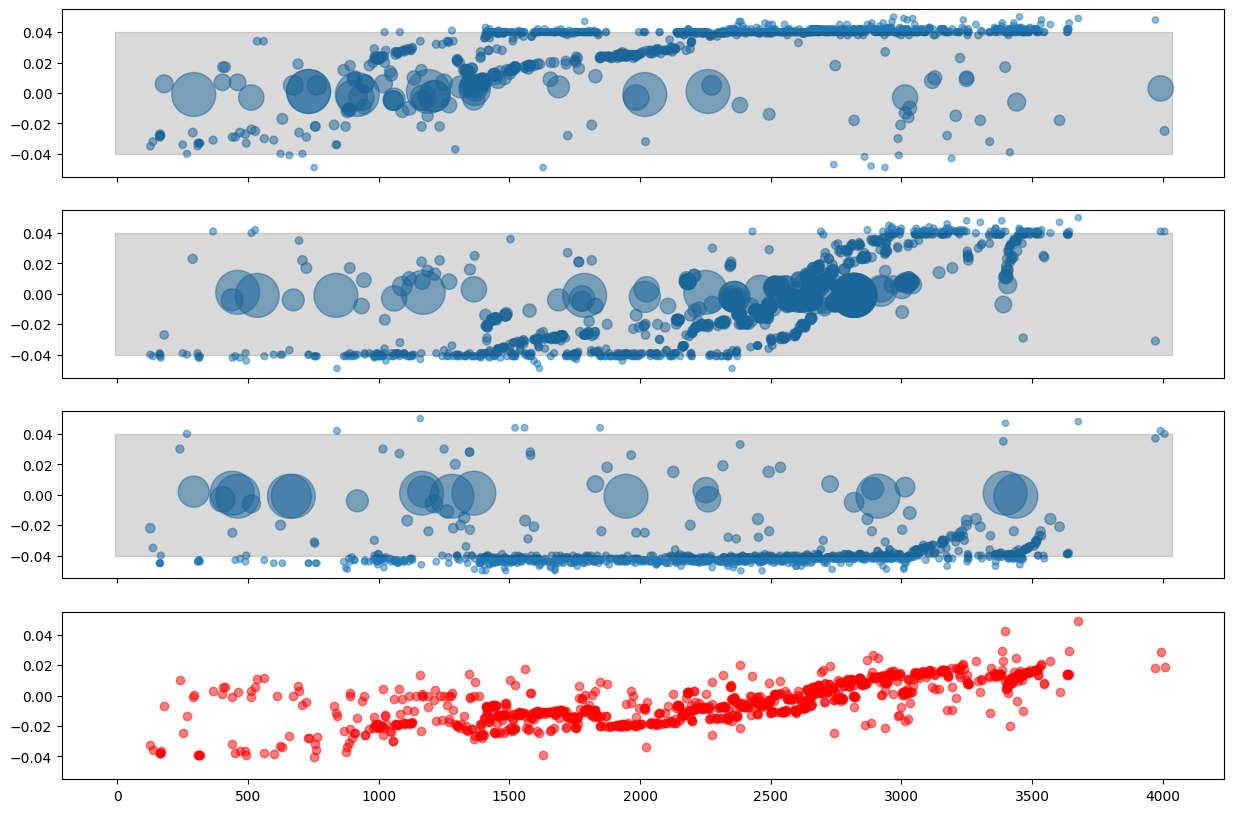

In [6]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10), sharex=True, sharey=True)

# this is way too strict
# data = df211[df211.h3_h4_dt.between(-0.05, 0.05)]
# data = data[data.h4_h5_dt.between(-0.05, 0.05)]
# data = data[data.h5_h6_dt.between(-0.05, 0.05)]
data = df188[['h3_h4_dt', 'h4_h5_dt', 'h5_h6_dt']].copy()
data[~data.h3_h4_dt.between(-0.05, 0.05)] = np.nan
data[~data.h4_h5_dt.between(-0.05, 0.05)] = np.nan
data[~data.h5_h6_dt.between(-0.05, 0.05)] = np.nan



x = data.index

y = data.h3_h4_dt.values
ax[0].scatter(x, y, s=np.abs(1/y), alpha=0.5)

y = data.h4_h5_dt.values
ax[1].scatter(x, y, s=np.abs(1/y), alpha=0.5)

y = data.h5_h6_dt.values
ax[2].scatter(x, y, s=np.abs(1/y), alpha=0.5)


y = data[['h3_h4_dt', 'h4_h5_dt', 'h5_h6_dt']].mean(axis=1)
ax[3].scatter(x, y, color='red', alpha=0.5,)


# df211.h3_h4_dt.plot(ax=ax[0])
# df211.h4_h5_dt.plot(ax=ax[1], marker='.', markersize=df211.h4_h5_dt.apply(lambda t: 100 if abs(t) < 0.04 else 0.001))
# df211.h5_h6_dt.plot(ax=ax[2], marker='.', markersize=df211.h5_h6_dt.apply(lambda t: 100 if abs(t) < 0.04 else 0.001))

# df211.h4_h3_dt.plot(ax=ax[0])
# df211.h5_h4_dt.plot(ax=ax[1])
# df211.h6_h5_dt.plot(ax=ax[2])

ax[0].fill_between(x=(-10, data.shape[0]+25), y1=-0.04, y2=0.04, color='black', alpha=0.15)
ax[1].fill_between(x=(-10, data.shape[0]+25), y1=-0.04, y2=0.04, color='black', alpha=0.15)
ax[2].fill_between(x=(-10, data.shape[0]+25), y1=-0.04, y2=0.04, color='black', alpha=0.15)

print(data.shape)

#this is tricking me because it is not depths it is only the calculations...
#you have to do this for depths 

<Axes: >

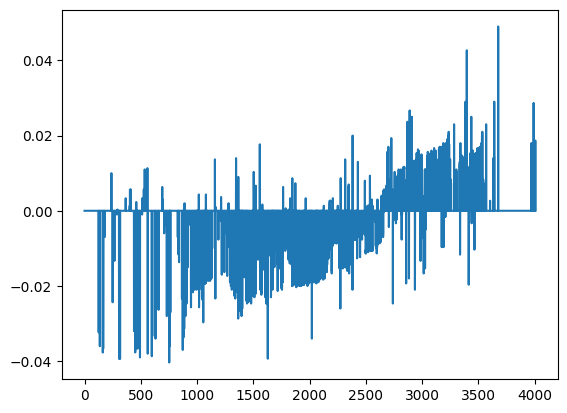

In [7]:
def calc_mean_with_nan(vals):
    vals[np.isnan(vals)] = 0
    return np.mean(vals)

data.apply(lambda row: calc_mean_with_nan(row), axis=1).plot()

<Axes: >

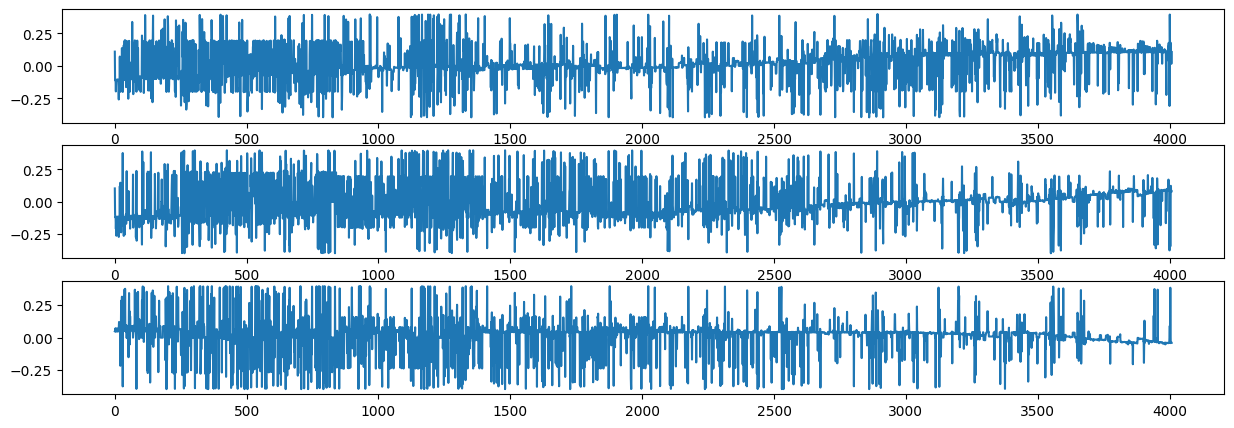

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(15, 5))

df188.h3_h5_dt.plot(ax=ax[0])
df188.h4_h6_dt.plot(ax=ax[1])
df188.h6_h5_dt.plot(ax=ax[2])

<Axes: >

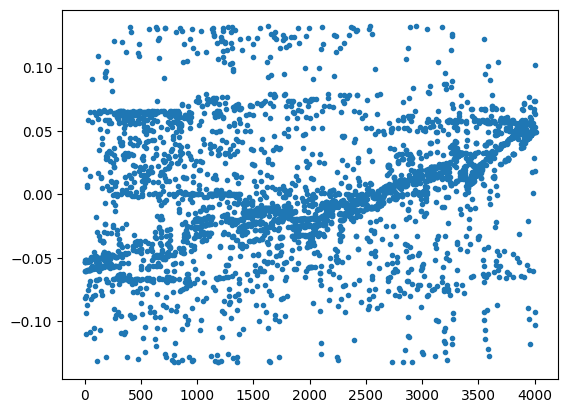

In [9]:
data = df188[['h3_h4_dt', 'h4_h5_dt', 'h5_h6_dt']]

# (data.abs() > 0.05).sum(axis=1)
data.mean(axis=1).plot(marker='.', linestyle='')

(400.0, 150.0)

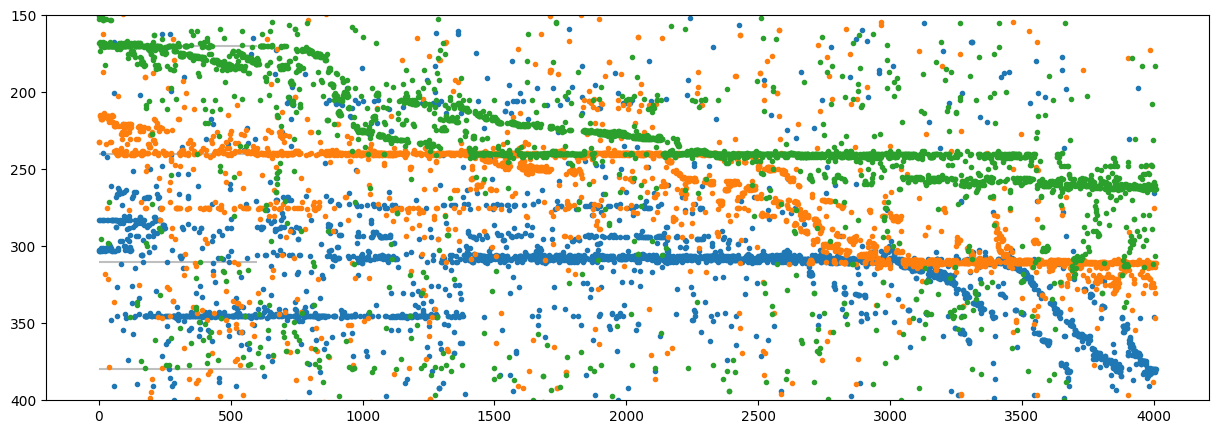

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))
df188.h5_h6_depth.plot(label='h5-h6', marker='.', linestyle='')
df188.h4_h5_depth.plot(label='h4-h5', marker='.', linestyle='')
df188.h3_h4_depth.plot(label='h3-h4', marker='.', linestyle='')

hdepths = [30, 100, 170, 240, 310, 380]

for hd in hdepths:
    ax.hlines(y=hd, xmin=0, xmax=600, color='black', zorder=0, alpha=0.25)

ax.set_ylim(400, 150)

<Axes: >

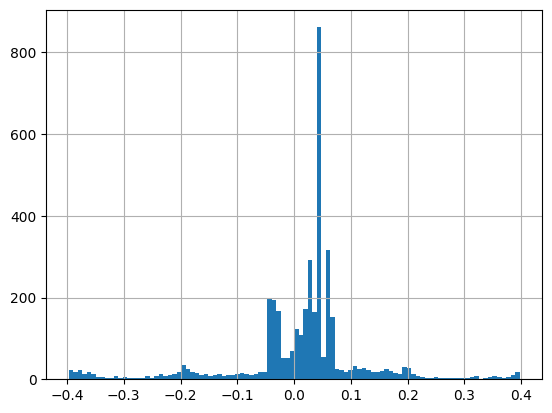

In [12]:
df188.h3_h4_dt.hist(bins=100)

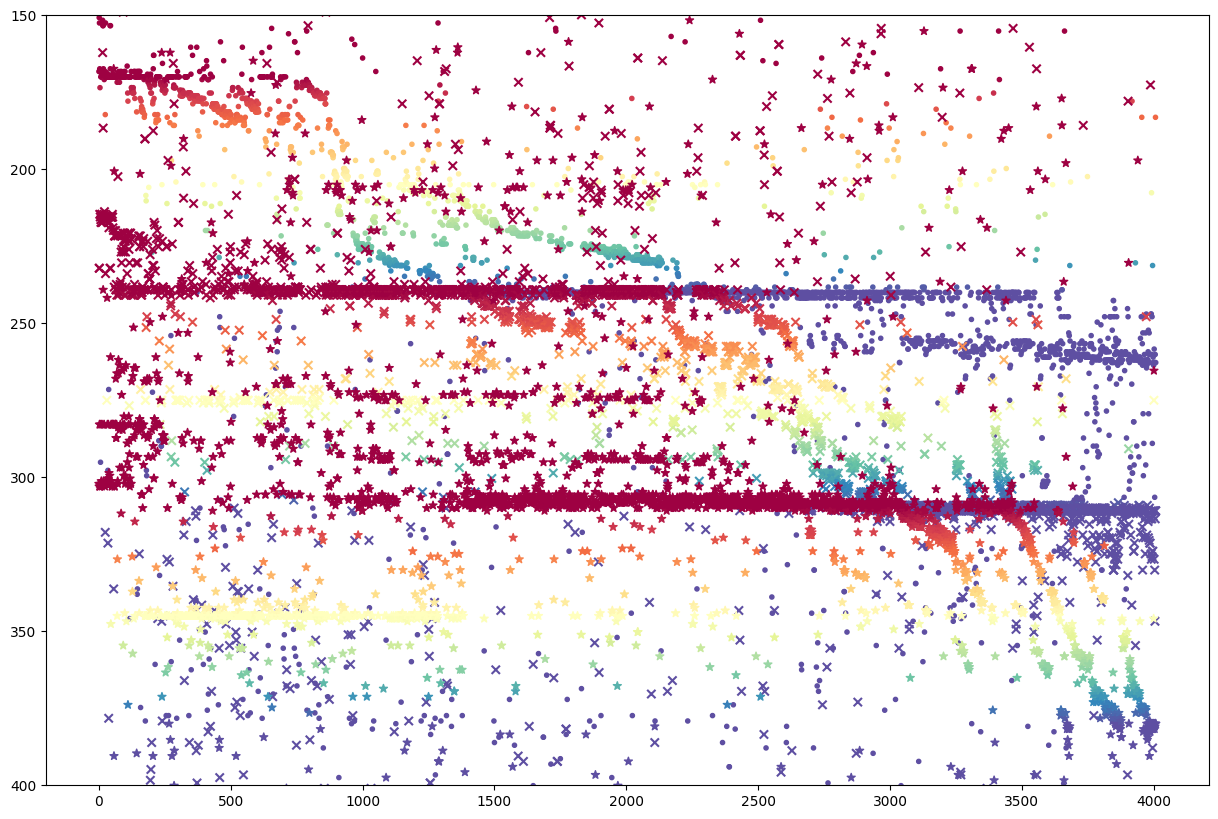

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))

x = df188.index

d56 = df188.h5_h6_depth.values
d45 = df188.h4_h5_depth.values
d34 = df188.h3_h4_depth.values

ax.scatter(x, d34, c=df188.h3_h4_dt.values, cmap='Spectral', vmin=-0.04, vmax=0.04, marker='.')
ax.scatter(x, d45, c=df188.h4_h5_dt.values, cmap='Spectral', vmin=-0.04, vmax=0.04, marker='x')
ax.scatter(x, d56, c=df188.h5_h6_dt.values, cmap='Spectral', vmin=-0.04, vmax=0.04, marker='*')

# df141.h5_h6_depth.plot(label='h5-h6', marker='.', linestyle='')
# df141.h4_h5_depth.plot(label='h4-h5', marker='.', linestyle='')
# df141.h3_h4_depth.plot(label='h3-h4', marker='.', linestyle='')

ax.set_ylim(400, 150)

hdepths = [30, 100, 170, 240, 310, 380]

# for hd in hdepths:
#     ax.hlines(y=hd, xmin=0, xmax=600, color='black', zorder=0, alpha=0.25)

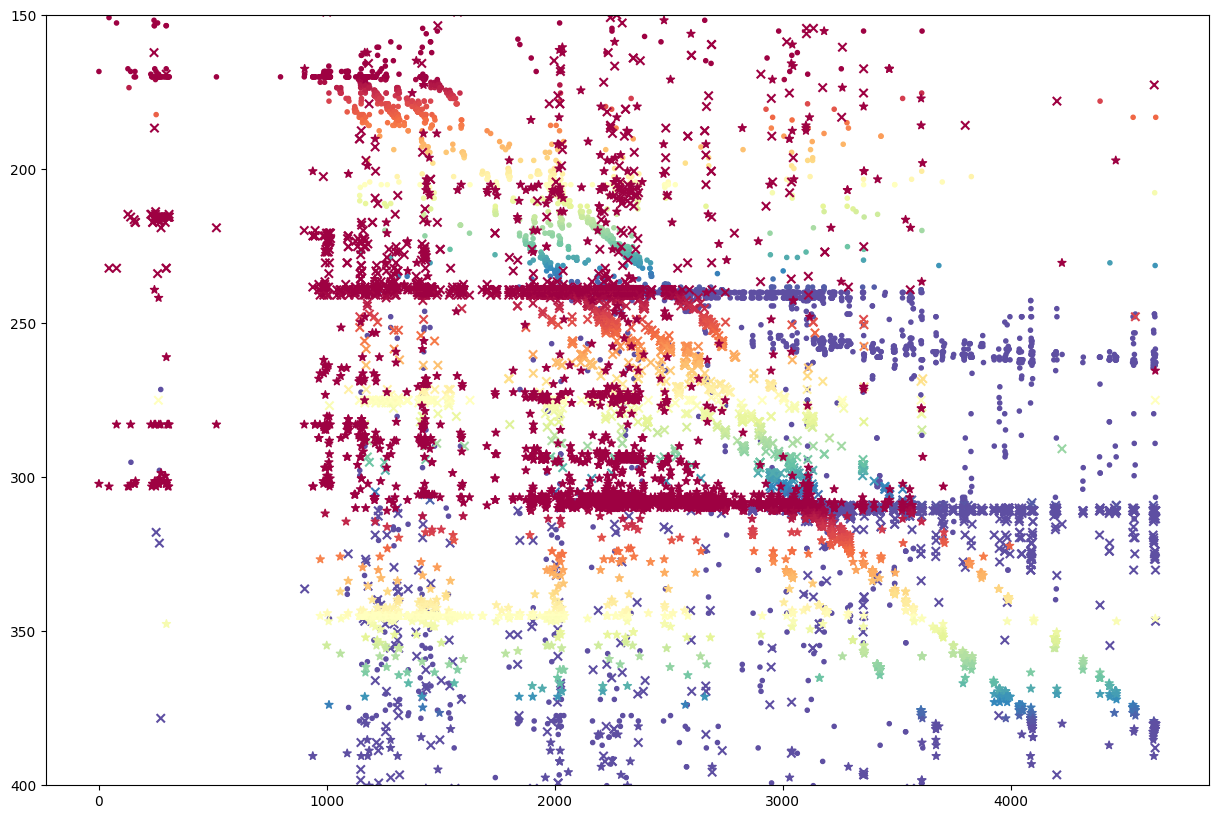

In [37]:
fig, ax = plt.subplots(figsize=(15, 10))

t = df188.datetime.apply(pd.to_datetime).diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum()

d56 = df188.h5_h6_depth.values
d45 = df188.h4_h5_depth.values
d34 = df188.h3_h4_depth.values

ax.scatter(t, d34, c=df188.h3_h4_dt.values, cmap='Spectral', vmin=-0.04, vmax=0.04, marker='.')
ax.scatter(t, d45, c=df188.h4_h5_dt.values, cmap='Spectral', vmin=-0.04, vmax=0.04, marker='x')
ax.scatter(t, d56, c=df188.h5_h6_dt.values, cmap='Spectral', vmin=-0.04, vmax=0.04, marker='*')

# df141.h5_h6_depth.plot(label='h5-h6', marker='.', linestyle='')
# df141.h4_h5_depth.plot(label='h4-h5', marker='.', linestyle='')
# df141.h3_h4_depth.plot(label='h3-h4', marker='.', linestyle='')

ax.set_ylim(400, 150)

hdepths = [30, 100, 170, 240, 310, 380]

# x = np.linspace(0, 4000, 100)
# y = 165 + (390 - 175)/3600 * x
# ax.plot(x, y)

# for hd in hdepths:
#     ax.hlines(y=hd, xmin=0, xmax=600, color='black', zorder=0, alpha=0.25)

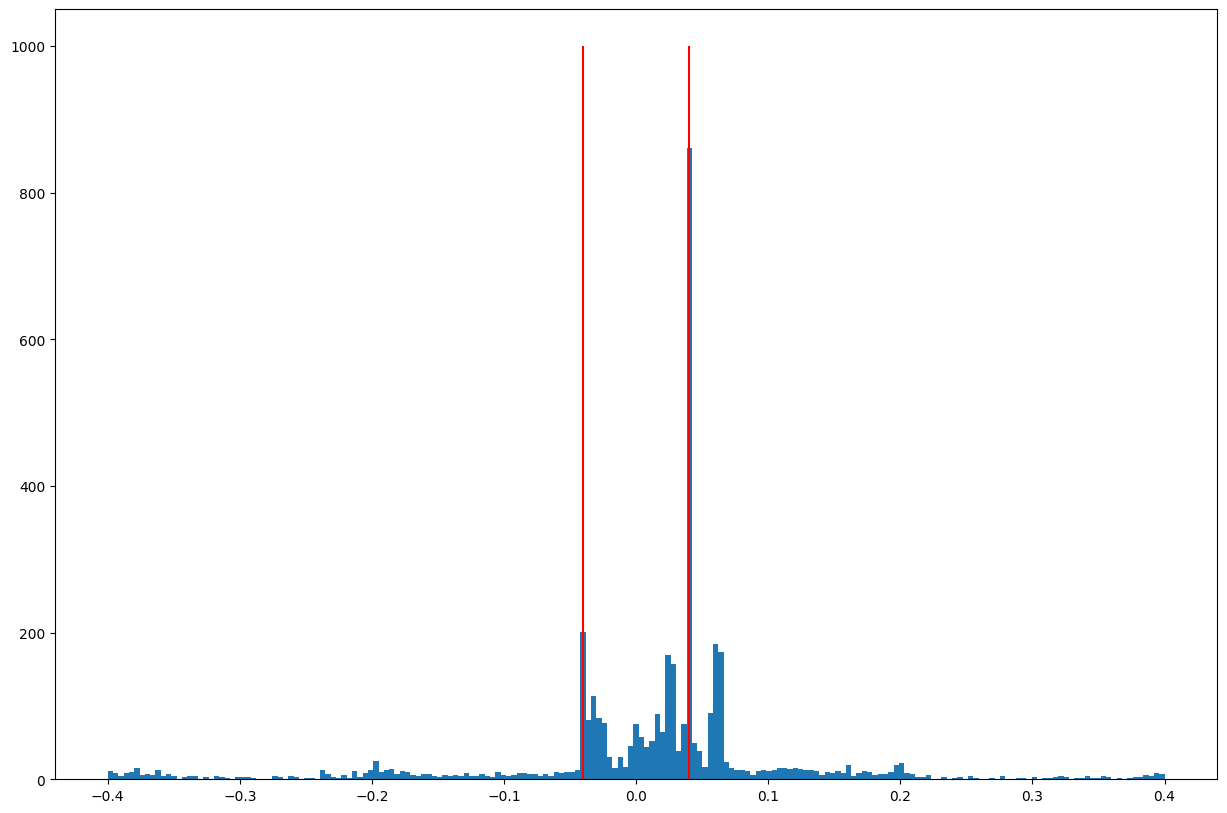

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))

d34 = df188.h3_h4_depth.values
d34_t = df188.h3_h4_dt.values

# ax.scatter(d34_t, d34)
ax.hist(d34_t, bins=np.linspace(-0.4, 0.4, 200))
ax.vlines(x=(-0.04, 0.04), ymin=0, ymax=1000, color='red')

In [19]:
# fig, ax = plt.subplots8

(400.0, 150.0)

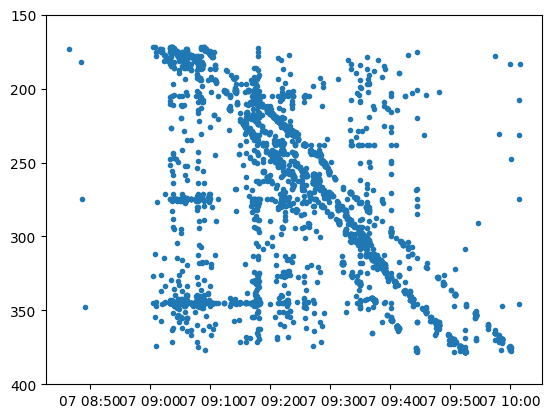

In [24]:
data34 = df188[['h3_h4_dt', 'h3_h4_depth', 'datetime']].copy()
data45 = df188[['h4_h5_dt', 'h4_h5_depth', 'datetime']].copy()
data56 = df188[['h5_h6_dt', 'h5_h6_depth', 'datetime']].copy()

data34 = data34[data34.h3_h4_dt.between(-0.038, 0.038)].copy()
data45 = data45[data45.h4_h5_dt.between(-0.038, 0.038)].copy()
data56 = data56[data56.h5_h6_dt.between(-0.038, 0.038)].copy()

data_idx = pd.concat([data34, data45, data56]).index

depths = np.concatenate([data34.h3_h4_depth.values
                         ,data45.h4_h5_depth.values
                         ,data56.h5_h6_depth.values
                        ])
times = df188.datetime.loc[data_idx].values

fig, ax = plt.subplots()

ax.scatter(times, depths, marker='.')

ax.set_ylim(400, 150)

In [ ]:
np.concatenate([[1,2], [3,4]])

<Axes: >

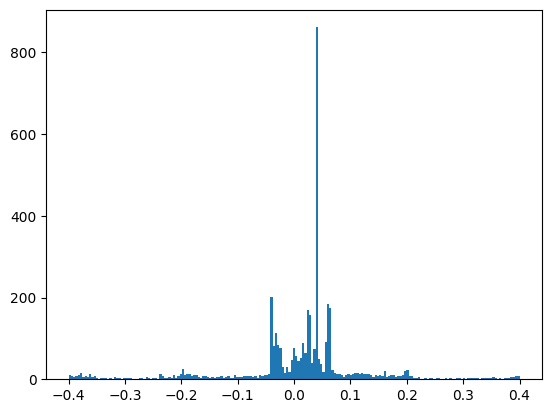

In [32]:
fig, ax = plt.subplots()
df188.h3_h4_dt.hist(bins=np.linspace(-0.4, 0.4, 200), ax=ax, grid=False)
# ax.vlines(x=(-0.04, 0.04), ymin=0, ymax=900, color='red')